In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import optuna 
import math
import seaborn as sns
from datetime import timedelta
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import xgboost as xgb

In [41]:
adidas_final_df = pd.read_csv('adidas_final_df.csv')
text_df_256 = pd.read_csv('text_df_256.csv')
img_xception_256_df = pd.read_csv('img_xception_256_df.csv')

text_df_256 = text_df_256.iloc[:, 1:]
text_df_256.columns = list('text' + str(i) for i in range(len(text_df_256.columns)))

img_xception_256_df = img_xception_256_df.iloc[:, 1:]
img_xception_256_df.columns = list('img' + str(i) for i in range(len(img_xception_256_df.columns)))

img_xception_256_df = pd.concat([adidas_final_df[['retail_price', 'avg_sale_price_12_month']], img_xception_256_df, text_df_256], axis=1)


In [42]:
img_xception_256_df

,retail_price,avg_sale_price_12_month,img0,img1,img2,img3,img4,img5,img6,img7,...,text246,text247,text248,text249,text250,text251,text252,text253,text254,text255
0,26175.0,396800.0,-0.344424,0.314252,0.636888,-0.110124,1.427636,0.142558,-0.125118,0.401051,...,0.004671,0.0,0.0,0.000000,0.0,0.000000,0.095853,0.0,0.000000,0.012071
1,15705.0,18100.0,-0.543836,-0.441732,-0.848318,0.050652,1.145771,0.174251,0.463265,-0.010514,...,0.013416,0.0,0.0,0.000000,0.0,0.000000,0.097410,0.0,0.019158,0.014088
2,13611.0,8900.0,-0.424214,-0.465234,-0.845963,-0.761746,1.412107,-0.204567,1.618392,0.145814,...,0.000000,0.0,0.0,0.000000,0.0,0.009519,0.102834,0.0,0.026707,0.013651
3,11517.0,13600.0,-0.410058,0.377196,0.122611,0.202982,-0.409141,0.804348,-0.376070,-0.508188,...,0.000000,0.0,0.0,0.000000,0.0,0.002437,0.084307,0.0,0.026473,0.011130
4,18846.0,13000.0,-0.090578,0.085736,-0.741189,0.199296,0.520834,0.227778,0.033564,-0.248696,...,0.000000,0.0,0.0,0.000000,0.0,0.001203,0.102468,0.0,0.020861,0.012482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3852,18846.0,13100.0,-0.009202,0.458891,-0.373391,0.613111,0.536686,0.530326,0.805984,-0.277875,...,0.018766,0.0,0.0,0.000000,0.0,0.000000,0.104636,0.0,0.018858,0.022884
3853,17799.0,10800.0,-0.982856,0.153590,-1.058947,-0.297112,0.215719,0.958843,0.628127,-1.061073,...,0.000864,0.0,0.0,0.002781,0.0,0.000000,0.100320,0.0,0.022693,0.018034
3854,5235.0,10700.0,-0.191105,-0.262827,0.836842,-0.636285,-0.813188,0.499072,0.166094,-0.482048,...,0.004802,0.0,0.0,0.000000,0.0,0.000000,0.106915,0.0,0.013810,0.011697
3855,13611.0,12200.0,0.267438,-0.904679,-0.432404,0.229211,0.328628,-1.272847,0.125231,-0.314479,...,0.005161,0.0,0.0,0.000000,0.0,0.000000,0.092534,0.0,0.026662,0.004541


[21:55:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:20485.6	eval-rmse:16114.7
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 10 rounds.
[1]	train-rmse:17086.8	eval-rmse:13884.5
[2]	train-rmse:14563.8	eval-rmse:12646.6
[3]	train-rmse:12741.3	eval-rmse:12031.3
[4]	train-rmse:11285.2	eval-rmse:11727.5
[5]	train-rmse:10233.5	eval-rmse:11280.4
[6]	train-rmse:9414.84	eval-rmse:10970.2
[7]	train-rmse:8847.75	eval-rmse:11009.1
[8]	train-rmse:8405.16	eval-rmse:11025.5
[9]	train-rmse:8019.23	eval-rmse:11072.5
[10]	train-rmse:7761.33	eval-rmse:11078
[11]	train-rmse:7560.47	eval-rmse:11122.7
[12]	train-rmse:7225.11	eval-rmse:11119.9
[13]	train-rmse:6965.23	eval-rmse:11115.3
[14]	train-rmse:6744.05	eval-rmse:11173.4
[15]	train-rmse:6449.74	eval-rmse:11179.5
[16]	train-rmse:6308.6	eval-rmse:11192.6
Stopping. Best iteration:
[6]	train-rmse

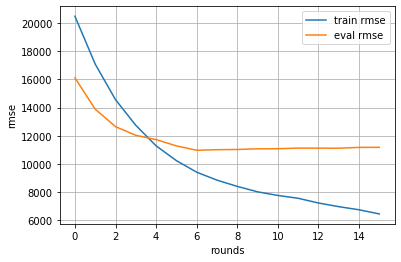

In [43]:
X = img_xception_256_df.drop('avg_sale_price_12_month', axis=1)
y = img_xception_256_df['avg_sale_price_12_month']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=20)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=20)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_val, label=y_val)

xgb_params = {
    # 回帰問題 reg:squarederror
    'objective': 'reg:linear',
    # 学習用の指標 (RMSE)
    'eval_metric': 'rmse',
}
evals = [(dtrain, 'train'), (dtest, 'eval')]
evals_result = {}
bst = xgb.train(xgb_params,
                dtrain,
                num_boost_round=1000,
                early_stopping_rounds=10,
                evals=evals,
                evals_result=evals_result,
                )

y_pred = bst.predict(dtest)
mse = mean_squared_error(y_val, y_pred)
print('RMSE:', math.sqrt(mse))

train_metric = evals_result['train']['rmse']
plt.plot(train_metric, label='train rmse')
eval_metric = evals_result['eval']['rmse']
plt.plot(eval_metric, label='eval rmse')
plt.grid()
plt.legend()
plt.xlabel('rounds')
plt.ylabel('rmse')
plt.show()

In [44]:
def objective(trial):  
    # ハイパーパラメータ  
    eta = trial.suggest_uniform("eta", 0.01, 0.2)  
    learning_rate = trial.suggest_uniform(" learning_rate", 0.1, 1.0)  
    max_depth = trial.suggest_int("max_depth", 2, 100)  
    subsample = trial.suggest_uniform("subsample", 0.5, 1.0)  
    colsample_bytree = trial.suggest_uniform("colsample_bytree", 0.5, 1.0)  

    # 学習  
    model = xgb.XGBRegressor(  
        eta=eta,  
        learning_rate=learning_rate,  
        max_depth=max_depth,  
        subsample=subsample,  
        colsample_bytree=colsample_bytree)  
    model.fit(x_train, y_train)  

    # 予測  
    y_pred = model.predict(x_validation)  
    return mean_squared_error(y_validation, y_pred)  

X = img_xception_256_df.drop('avg_sale_price_12_month', axis=1)
y = img_xception_256_df['avg_sale_price_12_month']

x_train, x_validation, y_train, y_validation = train_test_split(X, y,
                                                    test_size=0.3,
                                                    shuffle=True,
                                                    random_state=20,
                                                    )

study = optuna.create_study()  
study.optimize(objective, n_trials=100)  
print(study.best_params)  
print(study.best_value)  

[21:55:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 21:56:47,539] Trial 0 finished with value: 184229880.4364448 and parameters: {'eta': 0.027911137060954966, ' learning_rate': 0.3057134888056061, 'max_depth': 16, 'subsample': 0.7639702923896529, 'colsample_bytree': 0.7519785177167437}. Best is trial 0 with value: 184229880.4364448.


[21:56:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 21:59:13,375] Trial 1 finished with value: 264540220.0955297 and parameters: {'eta': 0.19378441540521305, ' learning_rate': 0.7708763796926548, 'max_depth': 65, 'subsample': 0.8531871695176481, 'colsample_bytree': 0.6684826584699529}. Best is trial 0 with value: 184229880.4364448.


[21:59:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 22:01:12,392] Trial 2 finished with value: 258309879.0677866 and parameters: {'eta': 0.0536863815417061, ' learning_rate': 0.883057643699441, 'max_depth': 46, 'subsample': 0.9670697609433245, 'colsample_bytree': 0.7484092365273746}. Best is trial 0 with value: 184229880.4364448.


[22:01:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 22:05:50,964] Trial 3 finished with value: 215369341.06397158 and parameters: {'eta': 0.12271098068278113, ' learning_rate': 0.47077259362464563, 'max_depth': 86, 'subsample': 0.9783678936244973, 'colsample_bytree': 0.6940222137794626}. Best is trial 0 with value: 184229880.4364448.


[22:05:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 22:09:18,153] Trial 4 finished with value: 168333779.88410962 and parameters: {'eta': 0.08082642132930422, ' learning_rate': 0.18829614273251133, 'max_depth': 40, 'subsample': 0.9982873118804687, 'colsample_bytree': 0.99997587178082}. Best is trial 4 with value: 168333779.88410962.


[22:09:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 22:11:57,498] Trial 5 finished with value: 215978239.65011212 and parameters: {'eta': 0.16995411015022077, ' learning_rate': 0.742790383708335, 'max_depth': 45, 'subsample': 0.915736989665647, 'colsample_bytree': 0.9915854072041926}. Best is trial 4 with value: 168333779.88410962.


[22:11:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 22:15:08,827] Trial 6 finished with value: 256265078.0489297 and parameters: {'eta': 0.18519462123816474, ' learning_rate': 0.603729960755439, 'max_depth': 77, 'subsample': 0.6196825164863499, 'colsample_bytree': 0.7019391128929894}. Best is trial 4 with value: 168333779.88410962.


[22:15:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 22:17:56,836] Trial 7 finished with value: 189309171.83655655 and parameters: {'eta': 0.1341208778752529, ' learning_rate': 0.28776000713084593, 'max_depth': 60, 'subsample': 0.7829391415912513, 'colsample_bytree': 0.6714289225527027}. Best is trial 4 with value: 168333779.88410962.


[22:17:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 22:20:00,393] Trial 8 finished with value: 292453522.428462 and parameters: {'eta': 0.14589894333033562, ' learning_rate': 0.800237138150721, 'max_depth': 65, 'subsample': 0.6853228095547588, 'colsample_bytree': 0.6099832416220123}. Best is trial 4 with value: 168333779.88410962.


[22:20:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 22:24:01,850] Trial 9 finished with value: 213063369.3466717 and parameters: {'eta': 0.08618425534874823, ' learning_rate': 0.3596804289141472, 'max_depth': 91, 'subsample': 0.6756744110838488, 'colsample_bytree': 0.7825139053353929}. Best is trial 4 with value: 168333779.88410962.


[22:24:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 22:25:20,345] Trial 10 finished with value: 177148770.49369076 and parameters: {'eta': 0.08223031319535033, ' learning_rate': 0.14830891429681892, 'max_depth': 19, 'subsample': 0.5168200101096516, 'colsample_bytree': 0.9994221759972348}. Best is trial 4 with value: 168333779.88410962.


[22:25:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 22:26:51,220] Trial 11 finished with value: 182171801.8395424 and parameters: {'eta': 0.07881855876685216, ' learning_rate': 0.1871321841279016, 'max_depth': 18, 'subsample': 0.5169091750323777, 'colsample_bytree': 0.9982490936446043}. Best is trial 4 with value: 168333779.88410962.


[22:26:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 22:28:49,855] Trial 12 finished with value: 184121229.88994232 and parameters: {'eta': 0.05244108359388983, ' learning_rate': 0.11478755581688388, 'max_depth': 31, 'subsample': 0.5065935204831666, 'colsample_bytree': 0.8937554932883695}. Best is trial 4 with value: 168333779.88410962.


[22:28:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 22:29:00,758] Trial 13 finished with value: 157146670.96874747 and parameters: {'eta': 0.10290609991853159, ' learning_rate': 0.10200352381003983, 'max_depth': 2, 'subsample': 0.5935287684109807, 'colsample_bytree': 0.9027042228258638}. Best is trial 13 with value: 157146670.96874747.


[22:29:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 22:29:15,168] Trial 14 finished with value: 168231321.44135234 and parameters: {'eta': 0.1070433597646275, ' learning_rate': 0.13037535031850495, 'max_depth': 3, 'subsample': 0.5925132418410262, 'colsample_bytree': 0.8894278344661363}. Best is trial 13 with value: 157146670.96874747.


[22:29:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 22:29:29,122] Trial 15 finished with value: 158224063.05167916 and parameters: {'eta': 0.10891240840780876, ' learning_rate': 0.10201597858520663, 'max_depth': 3, 'subsample': 0.5909973461645643, 'colsample_bytree': 0.8710399712087085}. Best is trial 13 with value: 157146670.96874747.


[22:29:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 22:29:37,582] Trial 16 finished with value: 190752212.79623154 and parameters: {'eta': 0.15717200203780368, ' learning_rate': 0.437799659324185, 'max_depth': 2, 'subsample': 0.58893040454706, 'colsample_bytree': 0.884954528177353}. Best is trial 13 with value: 157146670.96874747.


[22:29:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 22:30:07,159] Trial 17 finished with value: 236601243.95248356 and parameters: {'eta': 0.11018424058725566, ' learning_rate': 0.6033434515216036, 'max_depth': 6, 'subsample': 0.6722260538587308, 'colsample_bytree': 0.8396486838123106}. Best is trial 13 with value: 157146670.96874747.


[22:30:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 22:32:10,043] Trial 18 finished with value: 202523109.02063003 and parameters: {'eta': 0.056561243675153305, ' learning_rate': 0.24270734433185392, 'max_depth': 27, 'subsample': 0.5558807382089667, 'colsample_bytree': 0.9254776035898729}. Best is trial 13 with value: 157146670.96874747.


[22:32:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 22:32:58,000] Trial 19 finished with value: 208268243.82947934 and parameters: {'eta': 0.1255830811853078, ' learning_rate': 0.41545945500357545, 'max_depth': 10, 'subsample': 0.6981873897557858, 'colsample_bytree': 0.8281143667459843}. Best is trial 13 with value: 157146670.96874747.


[22:32:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 22:35:27,929] Trial 20 finished with value: 162385551.05416772 and parameters: {'eta': 0.016162851178260246, ' learning_rate': 0.10002709033883807, 'max_depth': 32, 'subsample': 0.6299642294909935, 'colsample_bytree': 0.9535544880326496}. Best is trial 13 with value: 157146670.96874747.


[22:35:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 22:37:50,141] Trial 21 finished with value: 170056206.02346396 and parameters: {'eta': 0.011322095503192478, ' learning_rate': 0.10873596792411463, 'max_depth': 32, 'subsample': 0.6353987120024523, 'colsample_bytree': 0.9111711904590943}. Best is trial 13 with value: 157146670.96874747.


[22:37:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 22:38:43,022] Trial 22 finished with value: 526690558.4868261 and parameters: {'eta': 0.02885031774013927, ' learning_rate': 0.9986721674725099, 'max_depth': 10, 'subsample': 0.5419067259535552, 'colsample_bytree': 0.9401481589590946}. Best is trial 13 with value: 157146670.96874747.


[22:38:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 22:40:39,097] Trial 23 finished with value: 189936374.09218106 and parameters: {'eta': 0.0965596122360743, ' learning_rate': 0.23352862254673895, 'max_depth': 23, 'subsample': 0.588678470615005, 'colsample_bytree': 0.961408663405923}. Best is trial 13 with value: 157146670.96874747.


[22:40:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 22:43:56,999] Trial 24 finished with value: 160816402.79719344 and parameters: {'eta': 0.013059903427624128, ' learning_rate': 0.10043119751812277, 'max_depth': 55, 'subsample': 0.721827659822984, 'colsample_bytree': 0.839572374913258}. Best is trial 13 with value: 157146670.96874747.


[22:43:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 22:47:55,739] Trial 25 finished with value: 203464500.86549196 and parameters: {'eta': 0.0643408597728386, ' learning_rate': 0.33985380577546087, 'max_depth': 57, 'subsample': 0.7356419466753871, 'colsample_bytree': 0.844140392737907}. Best is trial 13 with value: 157146670.96874747.


[22:47:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 22:51:21,754] Trial 26 finished with value: 189817407.30543932 and parameters: {'eta': 0.11448975584353355, ' learning_rate': 0.21271893816631274, 'max_depth': 71, 'subsample': 0.8417456003908637, 'colsample_bytree': 0.8006703764249505}. Best is trial 13 with value: 157146670.96874747.


[22:51:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 22:52:54,081] Trial 27 finished with value: 179218321.54755297 and parameters: {'eta': 0.14003967715241633, ' learning_rate': 0.10688997192354238, 'max_depth': 56, 'subsample': 0.7299702458975437, 'colsample_bytree': 0.5028380484677877}. Best is trial 13 with value: 157146670.96874747.


[22:52:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 22:58:32,333] Trial 28 finished with value: 221174277.75853157 and parameters: {'eta': 0.03433753679188528, ' learning_rate': 0.5153688818987473, 'max_depth': 100, 'subsample': 0.8113462092708612, 'colsample_bytree': 0.8670802543393282}. Best is trial 13 with value: 157146670.96874747.


[22:58:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 23:00:43,532] Trial 29 finished with value: 202198977.0360593 and parameters: {'eta': 0.09600681673235945, ' learning_rate': 0.27541588771019243, 'max_depth': 39, 'subsample': 0.5596730411596719, 'colsample_bytree': 0.7738363071097063}. Best is trial 13 with value: 157146670.96874747.


[23:00:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 23:03:54,696] Trial 30 finished with value: 203611992.94288275 and parameters: {'eta': 0.03916338205431805, ' learning_rate': 0.3561687461788893, 'max_depth': 48, 'subsample': 0.7699905238408092, 'colsample_bytree': 0.8075341756542261}. Best is trial 13 with value: 157146670.96874747.


[23:03:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 23:04:52,541] Trial 31 finished with value: 185536867.31073135 and parameters: {'eta': 0.011498138614981498, ' learning_rate': 0.16284282233584396, 'max_depth': 11, 'subsample': 0.6400007065218667, 'colsample_bytree': 0.9403297198823202}. Best is trial 13 with value: 157146670.96874747.


[23:04:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 23:07:22,782] Trial 32 finished with value: 171704932.8459109 and parameters: {'eta': 0.015725357257551285, ' learning_rate': 0.10988191170527756, 'max_depth': 33, 'subsample': 0.6216640103859337, 'colsample_bytree': 0.9641387818849217}. Best is trial 13 with value: 157146670.96874747.


[23:07:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 23:09:58,046] Trial 33 finished with value: 163575825.13420808 and parameters: {'eta': 0.02424543006652566, ' learning_rate': 0.10255835444998687, 'max_depth': 41, 'subsample': 0.7135141959545347, 'colsample_bytree': 0.8584320000939528}. Best is trial 13 with value: 157146670.96874747.


[23:09:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 23:10:52,512] Trial 34 finished with value: 197533253.83476308 and parameters: {'eta': 0.07294031217863425, ' learning_rate': 0.1785799404832721, 'max_depth': 14, 'subsample': 0.6398058937302081, 'colsample_bytree': 0.7356028525544351}. Best is trial 13 with value: 157146670.96874747.


[23:10:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 23:15:56,275] Trial 35 finished with value: 195568759.24855494 and parameters: {'eta': 0.04403617023062573, ' learning_rate': 0.24906175112782264, 'max_depth': 73, 'subsample': 0.6602339008111402, 'colsample_bytree': 0.9046867620949663}. Best is trial 13 with value: 157146670.96874747.


[23:15:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 23:19:32,094] Trial 36 finished with value: 185635310.7192787 and parameters: {'eta': 0.09836359627756175, ' learning_rate': 0.1738082873306444, 'max_depth': 52, 'subsample': 0.6006885698231973, 'colsample_bytree': 0.9576754115193031}. Best is trial 13 with value: 157146670.96874747.


[23:19:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 23:21:12,161] Trial 37 finished with value: 198045330.98986644 and parameters: {'eta': 0.12220998391335255, ' learning_rate': 0.214690291562702, 'max_depth': 23, 'subsample': 0.5615194891520157, 'colsample_bytree': 0.8672696150755188}. Best is trial 13 with value: 157146670.96874747.


[23:21:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 23:25:57,060] Trial 38 finished with value: 204544610.3810996 and parameters: {'eta': 0.15501648409550167, ' learning_rate': 0.31840497022564684, 'max_depth': 64, 'subsample': 0.917272889351021, 'colsample_bytree': 0.8199502683376194}. Best is trial 13 with value: 157146670.96874747.


[23:25:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 23:26:07,016] Trial 39 finished with value: 160256152.76498023 and parameters: {'eta': 0.1892485177763022, ' learning_rate': 0.10275256697850169, 'max_depth': 2, 'subsample': 0.6561156142693209, 'colsample_bytree': 0.7358906799367234}. Best is trial 13 with value: 157146670.96874747.


[23:26:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 23:26:27,501] Trial 40 finished with value: 191148426.33511218 and parameters: {'eta': 0.19901336189373298, ' learning_rate': 0.28822798587260057, 'max_depth': 5, 'subsample': 0.754148487277174, 'colsample_bytree': 0.730213707959227}. Best is trial 13 with value: 157146670.96874747.


[23:26:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 23:28:43,072] Trial 41 finished with value: 172681574.11123234 and parameters: {'eta': 0.18606190191033464, ' learning_rate': 0.10313452210161561, 'max_depth': 51, 'subsample': 0.6658160252451639, 'colsample_bytree': 0.6135456343846669}. Best is trial 13 with value: 157146670.96874747.


[23:28:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 23:28:55,138] Trial 42 finished with value: 160443920.79098007 and parameters: {'eta': 0.022232014929379592, ' learning_rate': 0.1504462109303734, 'max_depth': 2, 'subsample': 0.7022710653716405, 'colsample_bytree': 0.7573636404781732}. Best is trial 13 with value: 157146670.96874747.


[23:28:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 23:29:21,403] Trial 43 finished with value: 161641069.88061005 and parameters: {'eta': 0.1696146735506044, ' learning_rate': 0.14942223684854736, 'max_depth': 6, 'subsample': 0.6939620419814367, 'colsample_bytree': 0.7659365954984105}. Best is trial 13 with value: 157146670.96874747.


[23:29:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 23:30:25,612] Trial 44 finished with value: 179969004.4949554 and parameters: {'eta': 0.02156458879276119, ' learning_rate': 0.20064846960462587, 'max_depth': 16, 'subsample': 0.7268445787900822, 'colsample_bytree': 0.7043789284042634}. Best is trial 13 with value: 157146670.96874747.


[23:30:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 23:30:33,636] Trial 45 finished with value: 158509657.7943023 and parameters: {'eta': 0.17662772197459822, ' learning_rate': 0.15649349252776007, 'max_depth': 2, 'subsample': 0.7032981572484704, 'colsample_bytree': 0.6424603479978233}. Best is trial 13 with value: 157146670.96874747.


[23:30:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 23:30:42,284] Trial 46 finished with value: 160844639.4984495 and parameters: {'eta': 0.17094735997242813, ' learning_rate': 0.16070718374913798, 'max_depth': 2, 'subsample': 0.6131856560785282, 'colsample_bytree': 0.6322253435521008}. Best is trial 13 with value: 157146670.96874747.


[23:30:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 23:30:51,333] Trial 47 finished with value: 170368570.2850778 and parameters: {'eta': 0.1874343011430087, ' learning_rate': 0.25535013593145683, 'max_depth': 2, 'subsample': 0.7933710470497488, 'colsample_bytree': 0.6654343630969881}. Best is trial 13 with value: 157146670.96874747.


[23:30:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 23:31:23,928] Trial 48 finished with value: 228138993.27411374 and parameters: {'eta': 0.19539400089202877, ' learning_rate': 0.7018014870833511, 'max_depth': 9, 'subsample': 0.7047934823649719, 'colsample_bytree': 0.5518784266976751}. Best is trial 13 with value: 157146670.96874747.


[23:31:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 23:32:30,862] Trial 49 finished with value: 171923480.09786412 and parameters: {'eta': 0.17458640446258317, ' learning_rate': 0.148096524301995, 'max_depth': 21, 'subsample': 0.6666477298549882, 'colsample_bytree': 0.5579429476413917}. Best is trial 13 with value: 157146670.96874747.


[23:32:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 23:33:24,062] Trial 50 finished with value: 209241050.90739426 and parameters: {'eta': 0.15800148020314994, ' learning_rate': 0.38798613114847114, 'max_depth': 14, 'subsample': 0.6536643574780013, 'colsample_bytree': 0.6547586839029046}. Best is trial 13 with value: 157146670.96874747.


[23:33:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 23:33:52,611] Trial 51 finished with value: 162388510.35258612 and parameters: {'eta': 0.1817626251626116, ' learning_rate': 0.1347956737154712, 'max_depth': 7, 'subsample': 0.6869021768392952, 'colsample_bytree': 0.7136938711989331}. Best is trial 13 with value: 157146670.96874747.


[23:33:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 23:34:01,089] Trial 52 finished with value: 170957316.6173693 and parameters: {'eta': 0.04677750899141581, ' learning_rate': 0.19407147239898626, 'max_depth': 2, 'subsample': 0.7444162972938212, 'colsample_bytree': 0.7876278887075026}. Best is trial 13 with value: 157146670.96874747.


[23:34:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 23:34:57,980] Trial 53 finished with value: 169454848.04795194 and parameters: {'eta': 0.15090198720587755, ' learning_rate': 0.10056232702022187, 'max_depth': 13, 'subsample': 0.6060072762406357, 'colsample_bytree': 0.6841330904244072}. Best is trial 13 with value: 157146670.96874747.


[23:34:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 23:38:08,377] Trial 54 finished with value: 190903505.1883734 and parameters: {'eta': 0.16415594680245466, ' learning_rate': 0.14250473597674568, 'max_depth': 63, 'subsample': 0.5801270983434037, 'colsample_bytree': 0.7557688206810812}. Best is trial 13 with value: 157146670.96874747.


[23:38:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 23:38:17,989] Trial 55 finished with value: 527625641.2829536 and parameters: {'eta': 0.13375748304147153, ' learning_rate': 0.899684622810142, 'max_depth': 2, 'subsample': 0.5344317413820239, 'colsample_bytree': 0.8506743820554472}. Best is trial 13 with value: 157146670.96874747.


[23:38:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 23:40:00,461] Trial 56 finished with value: 185130768.87985727 and parameters: {'eta': 0.06395870926053335, ' learning_rate': 0.22554479947552722, 'max_depth': 18, 'subsample': 0.7153443603143756, 'colsample_bytree': 0.8770925585669344}. Best is trial 13 with value: 157146670.96874747.


[23:40:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 23:40:35,310] Trial 57 finished with value: 150788398.04333782 and parameters: {'eta': 0.19313085093115304, ' learning_rate': 0.12721711711575245, 'max_depth': 7, 'subsample': 0.767851914928194, 'colsample_bytree': 0.8252165837687049}. Best is trial 57 with value: 150788398.04333782.


[23:40:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 23:41:11,022] Trial 58 finished with value: 159257421.89122903 and parameters: {'eta': 0.1786375423523061, ' learning_rate': 0.18102628979188817, 'max_depth': 7, 'subsample': 0.8115122006755465, 'colsample_bytree': 0.7956688526762858}. Best is trial 57 with value: 150788398.04333782.


[23:41:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 23:41:51,252] Trial 59 finished with value: 166330744.34977862 and parameters: {'eta': 0.17813993990979818, ' learning_rate': 0.19640666274809548, 'max_depth': 8, 'subsample': 0.8312228260997129, 'colsample_bytree': 0.8205644121946665}. Best is trial 57 with value: 150788398.04333782.


[23:41:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 23:42:21,469] Trial 60 finished with value: 186596399.1115537 and parameters: {'eta': 0.1912595891391472, ' learning_rate': 0.3025431773747579, 'max_depth': 6, 'subsample': 0.8755631370677769, 'colsample_bytree': 0.7854852027838899}. Best is trial 57 with value: 150788398.04333782.


[23:42:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 23:43:08,313] Trial 61 finished with value: 167692288.87306592 and parameters: {'eta': 0.19486218758534934, ' learning_rate': 0.12390980428241524, 'max_depth': 11, 'subsample': 0.78399152931556, 'colsample_bytree': 0.7237005662260766}. Best is trial 57 with value: 150788398.04333782.


[23:43:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 23:43:25,693] Trial 62 finished with value: 168568769.1943988 and parameters: {'eta': 0.16277508062129098, ' learning_rate': 0.16923673032559244, 'max_depth': 4, 'subsample': 0.7659218595704882, 'colsample_bytree': 0.7553346555869154}. Best is trial 57 with value: 150788398.04333782.


[23:43:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 23:43:36,877] Trial 63 finished with value: 154195659.12158632 and parameters: {'eta': 0.08817953410346847, ' learning_rate': 0.13211593041246517, 'max_depth': 2, 'subsample': 0.8110013015134583, 'colsample_bytree': 0.8063472055507683}. Best is trial 57 with value: 150788398.04333782.


[23:43:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 23:44:23,924] Trial 64 finished with value: 154590403.91107467 and parameters: {'eta': 0.0902456034668366, ' learning_rate': 0.13162595995398962, 'max_depth': 9, 'subsample': 0.868238366959554, 'colsample_bytree': 0.8028506508453453}. Best is trial 57 with value: 150788398.04333782.


[23:44:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 23:46:38,190] Trial 65 finished with value: 208107619.7376931 and parameters: {'eta': 0.08624361276983951, ' learning_rate': 0.26517453809731006, 'max_depth': 26, 'subsample': 0.9089018231594889, 'colsample_bytree': 0.8077457932099312}. Best is trial 57 with value: 150788398.04333782.


[23:46:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 23:48:05,900] Trial 66 finished with value: 189785692.18885347 and parameters: {'eta': 0.09172275832430271, ' learning_rate': 0.23357612815537315, 'max_depth': 17, 'subsample': 0.8661460725022875, 'colsample_bytree': 0.7976997339273014}. Best is trial 57 with value: 150788398.04333782.


[23:48:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 23:48:54,259] Trial 67 finished with value: 157609926.03812066 and parameters: {'eta': 0.10470834155878121, ' learning_rate': 0.1339033323664474, 'max_depth': 10, 'subsample': 0.8212337161565558, 'colsample_bytree': 0.8306767322056743}. Best is trial 57 with value: 150788398.04333782.


[23:48:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 23:49:52,178] Trial 68 finished with value: 164463227.92402148 and parameters: {'eta': 0.11351763965522665, ' learning_rate': 0.12888855309959185, 'max_depth': 12, 'subsample': 0.8193001502535454, 'colsample_bytree': 0.8295931012615746}. Best is trial 57 with value: 150788398.04333782.


[23:49:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 23:51:17,414] Trial 69 finished with value: 187035925.42885563 and parameters: {'eta': 0.10318739993443836, ' learning_rate': 0.21350354485657969, 'max_depth': 15, 'subsample': 0.8860990071889208, 'colsample_bytree': 0.9034341049707442}. Best is trial 57 with value: 150788398.04333782.


[23:51:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 23:52:10,036] Trial 70 finished with value: 155137332.96807998 and parameters: {'eta': 0.07714604798700114, ' learning_rate': 0.12602010605769529, 'max_depth': 10, 'subsample': 0.8527610469136858, 'colsample_bytree': 0.8735186523137841}. Best is trial 57 with value: 150788398.04333782.


[23:52:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 23:53:03,769] Trial 71 finished with value: 158247611.60898823 and parameters: {'eta': 0.08297887084759233, ' learning_rate': 0.128139794308303, 'max_depth': 10, 'subsample': 0.8406285833112811, 'colsample_bytree': 0.921104037152365}. Best is trial 57 with value: 150788398.04333782.


[23:53:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 23:53:53,835] Trial 72 finished with value: 152455787.0639739 and parameters: {'eta': 0.0738461194480628, ' learning_rate': 0.1269527943668807, 'max_depth': 9, 'subsample': 0.8484656174484626, 'colsample_bytree': 0.9279002549393626}. Best is trial 57 with value: 150788398.04333782.


[23:53:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 23:55:48,236] Trial 73 finished with value: 163773733.07570973 and parameters: {'eta': 0.07483651705521237, ' learning_rate': 0.13067811316641573, 'max_depth': 21, 'subsample': 0.8564266959914312, 'colsample_bytree': 0.8905731883230731}. Best is trial 57 with value: 150788398.04333782.


[23:55:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 23:56:44,523] Trial 74 finished with value: 153721434.61565572 and parameters: {'eta': 0.06932489942716977, ' learning_rate': 0.18608364392497556, 'max_depth': 9, 'subsample': 0.7934934422879754, 'colsample_bytree': 0.9749232885182351}. Best is trial 57 with value: 150788398.04333782.


[23:56:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 23:59:10,680] Trial 75 finished with value: 159063085.4619581 and parameters: {'eta': 0.06799834924825941, ' learning_rate': 0.17543679247592675, 'max_depth': 27, 'subsample': 0.7961902647677227, 'colsample_bytree': 0.979961724182949}. Best is trial 57 with value: 150788398.04333782.


[23:59:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-29 23:59:58,834] Trial 76 finished with value: 165648101.0211412 and parameters: {'eta': 0.0901846283794415, ' learning_rate': 0.19547156168824603, 'max_depth': 9, 'subsample': 0.8923227779376084, 'colsample_bytree': 0.8542238677700469}. Best is trial 57 with value: 150788398.04333782.


[23:59:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 00:01:40,663] Trial 77 finished with value: 210662443.28121358 and parameters: {'eta': 0.057604476663723966, ' learning_rate': 0.4827828084798436, 'max_depth': 13, 'subsample': 0.9378162575678429, 'colsample_bytree': 0.9374670034492562}. Best is trial 57 with value: 150788398.04333782.


[00:01:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 00:03:28,504] Trial 78 finished with value: 158180265.5278175 and parameters: {'eta': 0.0797939668878583, ' learning_rate': 0.1018671954754225, 'max_depth': 20, 'subsample': 0.8229969723788498, 'colsample_bytree': 0.9797236168915511}. Best is trial 57 with value: 150788398.04333782.


[00:03:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 00:03:59,269] Trial 79 finished with value: 231108070.24143675 and parameters: {'eta': 0.10289605998220941, ' learning_rate': 0.5644824525632528, 'max_depth': 6, 'subsample': 0.8481612687260185, 'colsample_bytree': 0.8374187393031438}. Best is trial 57 with value: 150788398.04333782.


[00:03:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 00:05:32,035] Trial 80 finished with value: 163726048.5690327 and parameters: {'eta': 0.07485506943470384, ' learning_rate': 0.2373839159360685, 'max_depth': 16, 'subsample': 0.7955156339397683, 'colsample_bytree': 0.8836917725544776}. Best is trial 57 with value: 150788398.04333782.


[00:05:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 00:07:22,928] Trial 81 finished with value: 155872983.29392904 and parameters: {'eta': 0.09022591200618647, ' learning_rate': 0.11456474469023831, 'max_depth': 20, 'subsample': 0.8287868637712535, 'colsample_bytree': 0.9853426406049369}. Best is trial 57 with value: 150788398.04333782.


[00:07:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 00:07:50,232] Trial 82 finished with value: 152964109.10138324 and parameters: {'eta': 0.09099727764275597, ' learning_rate': 0.11469258326878984, 'max_depth': 5, 'subsample': 0.8629642772761649, 'colsample_bytree': 0.9187945470912153}. Best is trial 57 with value: 150788398.04333782.


[00:07:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 00:08:17,798] Trial 83 finished with value: 154511445.54105198 and parameters: {'eta': 0.08983037440956052, ' learning_rate': 0.11722046664559461, 'max_depth': 5, 'subsample': 0.8645313034330563, 'colsample_bytree': 0.9265957937361976}. Best is trial 57 with value: 150788398.04333782.


[00:08:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 00:08:42,985] Trial 84 finished with value: 151835237.65631288 and parameters: {'eta': 0.08794667983267636, ' learning_rate': 0.11849197518352163, 'max_depth': 5, 'subsample': 0.8613514682946445, 'colsample_bytree': 0.9195534740926457}. Best is trial 57 with value: 150788398.04333782.


[00:08:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 00:09:10,595] Trial 85 finished with value: 159775079.67486736 and parameters: {'eta': 0.07053055772066079, ' learning_rate': 0.16623602082756542, 'max_depth': 5, 'subsample': 0.8651999404416371, 'colsample_bytree': 0.9219614233316342}. Best is trial 57 with value: 150788398.04333782.


[00:09:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 00:09:57,325] Trial 86 finished with value: 156207763.2317784 and parameters: {'eta': 0.08597724441498798, ' learning_rate': 0.15198847474184063, 'max_depth': 8, 'subsample': 0.9012836487510102, 'colsample_bytree': 0.9476191852948455}. Best is trial 57 with value: 150788398.04333782.


[00:09:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 00:16:19,544] Trial 87 finished with value: 174312488.0204166 and parameters: {'eta': 0.09697204779502488, ' learning_rate': 0.20643552539866808, 'max_depth': 86, 'subsample': 0.9516735884775234, 'colsample_bytree': 0.9696368643189948}. Best is trial 57 with value: 150788398.04333782.


[00:16:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 00:16:36,501] Trial 88 finished with value: 155052269.36341646 and parameters: {'eta': 0.06474008484849225, ' learning_rate': 0.12305120612851748, 'max_depth': 4, 'subsample': 0.8722918450626428, 'colsample_bytree': 0.9305244120620834}. Best is trial 57 with value: 150788398.04333782.


[00:16:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 00:16:58,892] Trial 89 finished with value: 163640286.39864224 and parameters: {'eta': 0.06417943471199897, ' learning_rate': 0.1808858467473532, 'max_depth': 5, 'subsample': 0.9298867989111729, 'colsample_bytree': 0.9327075521493481}. Best is trial 57 with value: 150788398.04333782.


[00:16:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 00:17:16,097] Trial 90 finished with value: 153846017.82609218 and parameters: {'eta': 0.059738885732685695, ' learning_rate': 0.10327200873057958, 'max_depth': 4, 'subsample': 0.8789959332767302, 'colsample_bytree': 0.918888686855397}. Best is trial 57 with value: 150788398.04333782.


[00:17:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 00:17:33,130] Trial 91 finished with value: 157832206.2240777 and parameters: {'eta': 0.05695147190731023, ' learning_rate': 0.10425646444290064, 'max_depth': 4, 'subsample': 0.8800396057175143, 'colsample_bytree': 0.9135631320056963}. Best is trial 57 with value: 150788398.04333782.


[00:17:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 00:18:27,538] Trial 92 finished with value: 152541884.65886888 and parameters: {'eta': 0.05161915662818642, ' learning_rate': 0.15439381399127342, 'max_depth': 12, 'subsample': 0.8674855214572877, 'colsample_bytree': 0.9507964207353066}. Best is trial 57 with value: 150788398.04333782.


[00:18:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 00:19:21,936] Trial 93 finished with value: 159587568.79308918 and parameters: {'eta': 0.04953418640992407, ' learning_rate': 0.15549904205379086, 'max_depth': 12, 'subsample': 0.8933280046431746, 'colsample_bytree': 0.9450618810102738}. Best is trial 57 with value: 150788398.04333782.


[00:19:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 00:20:00,570] Trial 94 finished with value: 144752224.18061203 and parameters: {'eta': 0.08306994259592639, ' learning_rate': 0.10133309112773776, 'max_depth': 8, 'subsample': 0.8431499606217491, 'colsample_bytree': 0.9683039354111326}. Best is trial 94 with value: 144752224.18061203.


[00:20:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 00:20:33,599] Trial 95 finished with value: 215534266.29517254 and parameters: {'eta': 0.08310659516576571, ' learning_rate': 0.6489582026127847, 'max_depth': 7, 'subsample': 0.8400110951564838, 'colsample_bytree': 0.9664729574098266}. Best is trial 94 with value: 144752224.18061203.


[00:20:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 00:21:37,623] Trial 96 finished with value: 159141577.26099423 and parameters: {'eta': 0.06976840929117542, ' learning_rate': 0.10118027213152928, 'max_depth': 15, 'subsample': 0.8062352077780904, 'colsample_bytree': 0.9174422617119143}. Best is trial 94 with value: 144752224.18061203.


[00:21:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 00:22:32,505] Trial 97 finished with value: 163204589.25719315 and parameters: {'eta': 0.06094193716846367, ' learning_rate': 0.1866360755455604, 'max_depth': 12, 'subsample': 0.8540022113713869, 'colsample_bytree': 0.953385734985261}. Best is trial 94 with value: 144752224.18061203.


[00:22:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 00:23:02,959] Trial 98 finished with value: 161185974.16987622 and parameters: {'eta': 0.037677525079057486, ' learning_rate': 0.22390080859133976, 'max_depth': 7, 'subsample': 0.8364495995623593, 'colsample_bytree': 0.8969196499535753}. Best is trial 94 with value: 144752224.18061203.


[00:23:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 00:23:21,194] Trial 99 finished with value: 153353583.64693287 and parameters: {'eta': 0.05319232362300572, ' learning_rate': 0.14837295690714364, 'max_depth': 4, 'subsample': 0.8086631784506961, 'colsample_bytree': 0.9998889660380632}. Best is trial 94 with value: 144752224.18061203.


{'eta': 0.08306994259592639, ' learning_rate': 0.10133309112773776, 'max_depth': 8, 'subsample': 0.8431499606217491, 'colsample_bytree': 0.9683039354111326}
144752224.18061203


[09:40:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:23944.6	eval-rmse:18869.3
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 10 rounds.
[1]	train-rmse:22793.7	eval-rmse:17988.9
[2]	train-rmse:21561.2	eval-rmse:17054.9
[3]	train-rmse:20633	eval-rmse:16291.1
[4]	train-rmse:19580.4	eval-rmse:15662
[5]	train-rmse:18624.2	eval-rmse:15100.8
[6]	train-rmse:17711.1	eval-rmse:14641.3
[7]	train-rmse:16942.9	eval-rmse:14221
[8]	train-rmse:16329.1	eval-rmse:13824
[9]	train-rmse:15672	eval-rmse:13533.2
[10]	train-rmse:15214.9	eval-rmse:13251.1
[11]	train-rmse:14562.9	eval-rmse:13001.7
[12]	train-rmse:14120.5	eval-rmse:12768.8
[13]	train-rmse:13598.7	eval-rmse:12607.8
[14]	train-rmse:13080.2	eval-rmse:12445.7
[15]	train-rmse:12644.1	eval-rmse:12335.3
[16]	train-rmse:12311.6	eval-rmse:12243.9
[17]	train-rmse:11925.5	eval-rmse:12168.8
[18]	

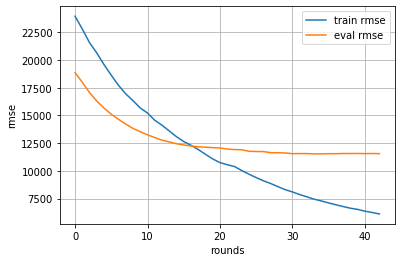

In [51]:
X = img_xception_256_df.drop('avg_sale_price_12_month', axis=1)
y = img_xception_256_df['avg_sale_price_12_month']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=20)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=20)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_val, label=y_val)

xgb_params = {
    # 回帰問題 reg:squarederror
    'objective': 'reg:linear',
    # 学習用の指標 (RMSE)
    'eval_metric': 'rmse', 
    'eta': 0.08306994259592639, 
    ' learning_rate': 0.10133309112773776, 
    'max_depth': 8, 
    'subsample': 0.8431499606217491, 
    'colsample_bytree': 0.9683039354111326
}
evals = [(dtrain, 'train'), (dtest, 'eval')]
evals_result = {}
bst = xgb.train(xgb_params,
                dtrain,
                num_boost_round=1000,
                early_stopping_rounds=10,
                evals=evals,
                evals_result=evals_result,
                )

y_pred = bst.predict(dtest)
mse = mean_squared_error(y_val, y_pred)
print('RMSE:', math.sqrt(mse))

train_metric = evals_result['train']['rmse']
plt.plot(train_metric, label='train rmse')
eval_metric = evals_result['eval']['rmse']
plt.plot(eval_metric, label='eval rmse')
plt.grid()
plt.legend()
plt.xlabel('rounds')
plt.ylabel('rmse')
plt.show()

In [46]:
def objective(trial):  
    # ハイパーパラメータ  
    eta = trial.suggest_uniform("eta", 0.01, 0.2)  
    learning_rate = trial.suggest_uniform(" learning_rate", 0.1, 1.0)  
    max_depth = trial.suggest_int("max_depth", 2, 100)  
    subsample = trial.suggest_uniform("subsample", 0.5, 1.0)  
    colsample_bytree = trial.suggest_uniform("colsample_bytree", 0.5, 1.0)  

    # 学習  
    model = xgb.XGBRegressor(  
        eta=eta,  
        learning_rate=learning_rate,  
        max_depth=max_depth,  
        subsample=subsample,  
        colsample_bytree=colsample_bytree)  
    model.fit(x_train, y_train)  

    # 予測  
    y_pred = model.predict(x_validation)  
    return mean_squared_error(y_validation, y_pred)  

X = img_xception_256_df.drop('avg_sale_price_12_month', axis=1)
y = img_xception_256_df['avg_sale_price_12_month']

Xs_train, X_test, ys_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=20)

x_train, x_validation, y_train, y_validation = train_test_split(Xs_train, ys_train,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=20)

study = optuna.create_study()  
study.optimize(objective, n_trials=100)  
print(study.best_params)  
print(study.best_value)  

[00:24:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 00:26:55,951] Trial 0 finished with value: 164343590.61229733 and parameters: {'eta': 0.019612908863612416, ' learning_rate': 0.6119340702288705, 'max_depth': 69, 'subsample': 0.8797507117143701, 'colsample_bytree': 0.7324569640863522}. Best is trial 0 with value: 164343590.61229733.


[00:26:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 00:28:59,623] Trial 1 finished with value: 156841638.23402357 and parameters: {'eta': 0.07398783675092069, ' learning_rate': 0.21395483859481462, 'max_depth': 34, 'subsample': 0.9482936297825262, 'colsample_bytree': 0.8739556472053378}. Best is trial 1 with value: 156841638.23402357.


[00:28:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 00:30:56,960] Trial 2 finished with value: 178148952.96206358 and parameters: {'eta': 0.07517123606429127, ' learning_rate': 0.6884472743358263, 'max_depth': 57, 'subsample': 0.7181306087151652, 'colsample_bytree': 0.6113054391070711}. Best is trial 1 with value: 156841638.23402357.


[00:30:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 00:33:34,114] Trial 3 finished with value: 226515199.19057554 and parameters: {'eta': 0.10265877880812595, ' learning_rate': 0.7885903903531831, 'max_depth': 68, 'subsample': 0.6384585671941034, 'colsample_bytree': 0.6143773943559161}. Best is trial 1 with value: 156841638.23402357.


[00:33:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 00:37:02,757] Trial 4 finished with value: 151046942.52266693 and parameters: {'eta': 0.11690584759748876, ' learning_rate': 0.15994138186088672, 'max_depth': 40, 'subsample': 0.8034265079342975, 'colsample_bytree': 0.9724479460083487}. Best is trial 4 with value: 151046942.52266693.


[00:37:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 00:38:05,780] Trial 5 finished with value: 161654377.21360025 and parameters: {'eta': 0.16352347103103745, ' learning_rate': 0.19119376547389366, 'max_depth': 16, 'subsample': 0.7909247167886211, 'colsample_bytree': 0.6813227069815924}. Best is trial 4 with value: 151046942.52266693.


[00:38:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 00:42:21,444] Trial 6 finished with value: 146550175.85945216 and parameters: {'eta': 0.18119309961645433, ' learning_rate': 0.3302184698141647, 'max_depth': 70, 'subsample': 0.6324655606480811, 'colsample_bytree': 0.8965797679855108}. Best is trial 6 with value: 146550175.85945216.


[00:42:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 00:42:37,412] Trial 7 finished with value: 278670557.46613234 and parameters: {'eta': 0.17048790045212722, ' learning_rate': 0.8863862621159704, 'max_depth': 3, 'subsample': 0.6406761045081246, 'colsample_bytree': 0.8786745531001674}. Best is trial 6 with value: 146550175.85945216.


[00:42:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 00:43:25,029] Trial 8 finished with value: 269778230.794702 and parameters: {'eta': 0.09209321485917334, ' learning_rate': 0.7967324648211473, 'max_depth': 15, 'subsample': 0.5731523604730155, 'colsample_bytree': 0.5409602622375177}. Best is trial 6 with value: 146550175.85945216.


[00:43:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 00:46:30,735] Trial 9 finished with value: 195024826.52729636 and parameters: {'eta': 0.04529086025986366, ' learning_rate': 0.5216567222130402, 'max_depth': 80, 'subsample': 0.6660368730089095, 'colsample_bytree': 0.5548772028443585}. Best is trial 6 with value: 146550175.85945216.


[00:46:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 00:49:48,971] Trial 10 finished with value: 185048635.54449844 and parameters: {'eta': 0.19763705525309178, ' learning_rate': 0.3803359546946188, 'max_depth': 100, 'subsample': 0.5014465406352916, 'colsample_bytree': 0.8544160126907863}. Best is trial 6 with value: 146550175.85945216.


[00:49:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 00:52:57,546] Trial 11 finished with value: 139179367.5009828 and parameters: {'eta': 0.14093305456824862, ' learning_rate': 0.10978808777377855, 'max_depth': 43, 'subsample': 0.8145140937993827, 'colsample_bytree': 0.996080537530792}. Best is trial 11 with value: 139179367.5009828.


[00:52:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 00:59:49,564] Trial 12 finished with value: 138673865.9465129 and parameters: {'eta': 0.1427013703392735, ' learning_rate': 0.34802187623576925, 'max_depth': 90, 'subsample': 0.859067744544165, 'colsample_bytree': 0.9749269707520382}. Best is trial 12 with value: 138673865.9465129.


[00:59:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 01:05:48,530] Trial 13 finished with value: 139869634.02388605 and parameters: {'eta': 0.138255299060353, ' learning_rate': 0.41157543720517165, 'max_depth': 98, 'subsample': 0.9006448334366405, 'colsample_bytree': 0.9824037318375947}. Best is trial 12 with value: 138673865.9465129.


[01:05:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 01:08:17,167] Trial 14 finished with value: 141440862.97130808 and parameters: {'eta': 0.1377406483344502, ' learning_rate': 0.11183778936958674, 'max_depth': 42, 'subsample': 0.8478445645450785, 'colsample_bytree': 0.9945186901676063}. Best is trial 12 with value: 138673865.9465129.


[01:08:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 01:12:09,470] Trial 15 finished with value: 147121982.27981746 and parameters: {'eta': 0.14260161122206064, ' learning_rate': 0.28892039883786713, 'max_depth': 88, 'subsample': 0.9809918560993652, 'colsample_bytree': 0.7860327854184959}. Best is trial 12 with value: 138673865.9465129.


[01:12:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 01:14:15,862] Trial 16 finished with value: 185151250.15339622 and parameters: {'eta': 0.12355208834432874, ' learning_rate': 0.48709195056552984, 'max_depth': 27, 'subsample': 0.7374312489426768, 'colsample_bytree': 0.9380879494732892}. Best is trial 12 with value: 138673865.9465129.


[01:14:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 01:18:02,070] Trial 17 finished with value: 148758044.70352185 and parameters: {'eta': 0.15543130981514783, ' learning_rate': 0.2503306614717089, 'max_depth': 52, 'subsample': 0.8043802552041104, 'colsample_bytree': 0.7926893805707463}. Best is trial 12 with value: 138673865.9465129.


[01:18:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 01:22:05,100] Trial 18 finished with value: 143556409.21289983 and parameters: {'eta': 0.17915128481059078, ' learning_rate': 0.1080696185496608, 'max_depth': 58, 'subsample': 0.9305651313742483, 'colsample_bytree': 0.9320767329761346}. Best is trial 12 with value: 138673865.9465129.


[01:22:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 01:27:18,102] Trial 19 finished with value: 157447641.07681406 and parameters: {'eta': 0.18962196403759127, ' learning_rate': 0.44288173014291754, 'max_depth': 86, 'subsample': 0.9989172672578943, 'colsample_bytree': 0.8263695632740088}. Best is trial 12 with value: 138673865.9465129.


[01:27:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 01:29:33,828] Trial 20 finished with value: 150027048.4898746 and parameters: {'eta': 0.11930198991037232, ' learning_rate': 0.33387136957618224, 'max_depth': 26, 'subsample': 0.8552203047486324, 'colsample_bytree': 0.9977276307062707}. Best is trial 12 with value: 138673865.9465129.


[01:29:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 01:36:43,560] Trial 21 finished with value: 167433785.5589972 and parameters: {'eta': 0.14573144028357735, ' learning_rate': 0.43476743853656263, 'max_depth': 99, 'subsample': 0.9093126294724637, 'colsample_bytree': 0.9495320666971039}. Best is trial 12 with value: 138673865.9465129.


[01:36:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 01:42:22,776] Trial 22 finished with value: 178265458.23782513 and parameters: {'eta': 0.13350478407849345, ' learning_rate': 0.6150472832245912, 'max_depth': 93, 'subsample': 0.8845757020566253, 'colsample_bytree': 0.9996687162222296}. Best is trial 12 with value: 138673865.9465129.


[01:42:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 01:47:18,044] Trial 23 finished with value: 156295209.71008033 and parameters: {'eta': 0.1523342466604125, ' learning_rate': 0.39463193998837587, 'max_depth': 78, 'subsample': 0.8316877971812913, 'colsample_bytree': 0.9125862770278654}. Best is trial 12 with value: 138673865.9465129.


[01:47:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 01:50:12,351] Trial 24 finished with value: 192956971.73925653 and parameters: {'eta': 0.09465434309280786, ' learning_rate': 0.574291992970632, 'max_depth': 46, 'subsample': 0.951392962353462, 'colsample_bytree': 0.9984101105341939}. Best is trial 12 with value: 138673865.9465129.


[01:50:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 01:55:23,337] Trial 25 finished with value: 162931041.053113 and parameters: {'eta': 0.11477957930623531, ' learning_rate': 0.2955264477035178, 'max_depth': 100, 'subsample': 0.771309900168593, 'colsample_bytree': 0.9620659804550974}. Best is trial 12 with value: 138673865.9465129.


[01:55:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 01:58:21,961] Trial 26 finished with value: 186127799.9183693 and parameters: {'eta': 0.1611386454378668, ' learning_rate': 0.49204556077845196, 'max_depth': 62, 'subsample': 0.7050038449483497, 'colsample_bytree': 0.8316189519207607}. Best is trial 12 with value: 138673865.9465129.


[01:58:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 02:01:57,762] Trial 27 finished with value: 145768288.4234691 and parameters: {'eta': 0.12832808658932857, ' learning_rate': 0.1395129102033848, 'max_depth': 78, 'subsample': 0.8956912812867627, 'colsample_bytree': 0.9192733644109693}. Best is trial 12 with value: 138673865.9465129.


[02:01:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 02:04:25,798] Trial 28 finished with value: 155765483.0648158 and parameters: {'eta': 0.17047865356063305, ' learning_rate': 0.2561277169517415, 'max_depth': 34, 'subsample': 0.8409266057113166, 'colsample_bytree': 0.9676680715480676}. Best is trial 12 with value: 138673865.9465129.


[02:04:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 02:07:22,489] Trial 29 finished with value: 166431363.7383812 and parameters: {'eta': 0.14063021476071785, ' learning_rate': 0.6204242835487285, 'max_depth': 92, 'subsample': 0.8741697951458725, 'colsample_bytree': 0.7128665134523677}. Best is trial 12 with value: 138673865.9465129.


[02:07:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 02:11:54,394] Trial 30 finished with value: 153908916.99587587 and parameters: {'eta': 0.10254094809508918, ' learning_rate': 0.36736103094898875, 'max_depth': 70, 'subsample': 0.7669827473246198, 'colsample_bytree': 0.9972110096379336}. Best is trial 12 with value: 138673865.9465129.


[02:11:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 02:14:59,076] Trial 31 finished with value: 145361369.81475747 and parameters: {'eta': 0.13526703102146784, ' learning_rate': 0.14112685237854558, 'max_depth': 42, 'subsample': 0.8299443669665495, 'colsample_bytree': 0.9786917362452371}. Best is trial 12 with value: 138673865.9465129.


[02:14:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 02:18:23,160] Trial 32 finished with value: 141256866.8986456 and parameters: {'eta': 0.14971699393362195, ' learning_rate': 0.2048215843961763, 'max_depth': 48, 'subsample': 0.9226889943949608, 'colsample_bytree': 0.9984809283179823}. Best is trial 12 with value: 138673865.9465129.


[02:18:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 02:21:11,786] Trial 33 finished with value: 155158349.05696362 and parameters: {'eta': 0.15165211063815245, ' learning_rate': 0.21088506958764044, 'max_depth': 50, 'subsample': 0.9564240682147233, 'colsample_bytree': 0.8894090944336379}. Best is trial 12 with value: 138673865.9465129.


[02:21:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 02:23:13,684] Trial 34 finished with value: 157328120.831245 and parameters: {'eta': 0.11022391571400937, ' learning_rate': 0.2495063459517322, 'max_depth': 32, 'subsample': 0.9173667756143359, 'colsample_bytree': 0.9487170815399699}. Best is trial 12 with value: 138673865.9465129.


[02:23:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 02:26:11,133] Trial 35 finished with value: 150401620.17485172 and parameters: {'eta': 0.16973465797418963, ' learning_rate': 0.1878844250908195, 'max_depth': 52, 'subsample': 0.8742515964133759, 'colsample_bytree': 0.9137032503265872}. Best is trial 12 with value: 138673865.9465129.


[02:26:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 02:29:59,857] Trial 36 finished with value: 166128106.92436478 and parameters: {'eta': 0.12671903203045665, ' learning_rate': 0.42064264522225236, 'max_depth': 62, 'subsample': 0.9775117598634064, 'colsample_bytree': 0.9656576592436623}. Best is trial 12 with value: 138673865.9465129.


[02:29:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 02:32:52,507] Trial 37 finished with value: 142505510.8150344 and parameters: {'eta': 0.011898165633026953, ' learning_rate': 0.3151023627779197, 'max_depth': 38, 'subsample': 0.9310690422811636, 'colsample_bytree': 0.9782388501542114}. Best is trial 12 with value: 138673865.9465129.


[02:32:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 02:36:04,897] Trial 38 finished with value: 169928330.64620572 and parameters: {'eta': 0.06882524596062913, ' learning_rate': 0.35036024266604215, 'max_depth': 47, 'subsample': 0.8063338196512946, 'colsample_bytree': 0.8635085556859774}. Best is trial 12 with value: 138673865.9465129.


[02:36:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 02:37:06,279] Trial 39 finished with value: 147644420.69815618 and parameters: {'eta': 0.18077696321406447, ' learning_rate': 0.19763946132709054, 'max_depth': 20, 'subsample': 0.8644990393272565, 'colsample_bytree': 0.6786804906826167}. Best is trial 12 with value: 138673865.9465129.


[02:37:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 02:40:59,484] Trial 40 finished with value: 146845924.85818285 and parameters: {'eta': 0.16046598736275294, ' learning_rate': 0.2606688699181562, 'max_depth': 57, 'subsample': 0.8985591730442083, 'colsample_bytree': 0.8986971679709939}. Best is trial 12 with value: 138673865.9465129.


[02:40:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 02:43:46,841] Trial 41 finished with value: 135498756.14368764 and parameters: {'eta': 0.14452916353830597, ' learning_rate': 0.10480286583832767, 'max_depth': 41, 'subsample': 0.833237598567807, 'colsample_bytree': 0.9990908300760422}. Best is trial 41 with value: 135498756.14368764.


[02:43:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 02:46:36,054] Trial 42 finished with value: 141288582.71449766 and parameters: {'eta': 0.14878520455076513, ' learning_rate': 0.16795310935203278, 'max_depth': 39, 'subsample': 0.8130283434004317, 'colsample_bytree': 0.9416681336175389}. Best is trial 41 with value: 135498756.14368764.


[02:46:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 02:48:54,301] Trial 43 finished with value: 144996351.58256558 and parameters: {'eta': 0.1312640305310861, ' learning_rate': 0.12544567024900005, 'max_depth': 31, 'subsample': 0.8275274392838863, 'colsample_bytree': 0.9806165911982475}. Best is trial 41 with value: 135498756.14368764.


[02:48:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 02:50:55,981] Trial 44 finished with value: 158189985.08750468 and parameters: {'eta': 0.14498788679082744, ' learning_rate': 0.2265664059085603, 'max_depth': 43, 'subsample': 0.7829536756484443, 'colsample_bytree': 0.6070579472161457}. Best is trial 41 with value: 135498756.14368764.


[02:50:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 02:53:29,843] Trial 45 finished with value: 140839954.49608287 and parameters: {'eta': 0.16419166610897784, ' learning_rate': 0.1005777647402156, 'max_depth': 36, 'subsample': 0.8527981872637889, 'colsample_bytree': 0.9971265094843234}. Best is trial 41 with value: 135498756.14368764.


[02:53:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 02:55:28,689] Trial 46 finished with value: 186978453.83854124 and parameters: {'eta': 0.19274018796107584, ' learning_rate': 0.5482363934031381, 'max_depth': 24, 'subsample': 0.7443390010589463, 'colsample_bytree': 0.9569996419525227}. Best is trial 41 with value: 135498756.14368764.


[02:55:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 02:56:29,877] Trial 47 finished with value: 274079850.6967031 and parameters: {'eta': 0.16799528525193005, ' learning_rate': 0.9527380351249776, 'max_depth': 13, 'subsample': 0.7238132040262464, 'colsample_bytree': 0.9322179295560159}. Best is trial 41 with value: 135498756.14368764.


[02:56:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 02:59:03,819] Trial 48 finished with value: 186310271.93924248 and parameters: {'eta': 0.17572196103739135, ' learning_rate': 0.6968085727375765, 'max_depth': 34, 'subsample': 0.8602756122351023, 'colsample_bytree': 0.9828231044398009}. Best is trial 41 with value: 135498756.14368764.


[02:59:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 02:59:33,103] Trial 49 finished with value: 180052781.13388512 and parameters: {'eta': 0.1625552536602206, ' learning_rate': 0.49117315639695414, 'max_depth': 6, 'subsample': 0.7896639554440159, 'colsample_bytree': 0.9222633665628341}. Best is trial 41 with value: 135498756.14368764.


[02:59:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 03:01:53,926] Trial 50 finished with value: 136227626.33984134 and parameters: {'eta': 0.12069812040974481, ' learning_rate': 0.11369721271319316, 'max_depth': 36, 'subsample': 0.8147999473573847, 'colsample_bytree': 0.8413377369317697}. Best is trial 41 with value: 135498756.14368764.


[03:01:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 03:04:20,242] Trial 51 finished with value: 140139938.23172766 and parameters: {'eta': 0.12260547259962858, ' learning_rate': 0.1049459381005975, 'max_depth': 37, 'subsample': 0.8182887251721604, 'colsample_bytree': 0.8547693440638211}. Best is trial 41 with value: 135498756.14368764.


[03:04:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 03:06:29,642] Trial 52 finished with value: 141151293.32216606 and parameters: {'eta': 0.11969192939026048, ' learning_rate': 0.16318138005599722, 'max_depth': 28, 'subsample': 0.819208633988249, 'colsample_bytree': 0.7612174016052018}. Best is trial 41 with value: 135498756.14368764.


[03:06:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 03:09:05,792] Trial 53 finished with value: 142058891.45655805 and parameters: {'eta': 0.10567048074731722, ' learning_rate': 0.1017735006877889, 'max_depth': 43, 'subsample': 0.7849012982160837, 'colsample_bytree': 0.8410131393253635}. Best is trial 41 with value: 135498756.14368764.


[03:09:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 03:12:17,693] Trial 54 finished with value: 144400442.33800542 and parameters: {'eta': 0.13776528356560788, ' learning_rate': 0.15100539790693387, 'max_depth': 56, 'subsample': 0.7595969162866864, 'colsample_bytree': 0.802600315477842}. Best is trial 41 with value: 135498756.14368764.


[03:12:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 03:14:01,407] Trial 55 finished with value: 155433513.8275849 and parameters: {'eta': 0.08975021948764514, ' learning_rate': 0.2905960159736789, 'max_depth': 22, 'subsample': 0.893622860550253, 'colsample_bytree': 0.7580285256565622}. Best is trial 41 with value: 135498756.14368764.


[03:14:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 03:16:30,492] Trial 56 finished with value: 145542065.108912 and parameters: {'eta': 0.11427897367561013, ' learning_rate': 0.10131351845323028, 'max_depth': 30, 'subsample': 0.8407572127746314, 'colsample_bytree': 0.8716078664107172}. Best is trial 41 with value: 135498756.14368764.


[03:16:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 03:21:13,750] Trial 57 finished with value: 176645943.52637336 and parameters: {'eta': 0.12245579561922904, ' learning_rate': 0.3933110010944795, 'max_depth': 95, 'subsample': 0.685927085373997, 'colsample_bytree': 0.7205187784789151}. Best is trial 41 with value: 135498756.14368764.


[03:21:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 03:23:53,350] Trial 58 finished with value: 142303537.0660197 and parameters: {'eta': 0.12795979840972652, ' learning_rate': 0.16834356749665286, 'max_depth': 38, 'subsample': 0.7973245157976702, 'colsample_bytree': 0.8077934982803452}. Best is trial 41 with value: 135498756.14368764.


[03:23:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 03:30:05,330] Trial 59 finished with value: 162865178.5970863 and parameters: {'eta': 0.15607062073181135, ' learning_rate': 0.44856484044290706, 'max_depth': 87, 'subsample': 0.876634125984054, 'colsample_bytree': 0.8957714557870313}. Best is trial 41 with value: 135498756.14368764.


[03:30:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 03:31:35,468] Trial 60 finished with value: 213198871.14226863 and parameters: {'eta': 0.14120044756858388, ' learning_rate': 0.6771362862504575, 'max_depth': 46, 'subsample': 0.819340712776469, 'colsample_bytree': 0.5029853877979085}. Best is trial 41 with value: 135498756.14368764.


[03:31:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 03:33:28,921] Trial 61 finished with value: 143518453.21395355 and parameters: {'eta': 0.13236693706525607, ' learning_rate': 0.10447257123487973, 'max_depth': 36, 'subsample': 0.8451673701507589, 'colsample_bytree': 0.8517151495852563}. Best is trial 41 with value: 135498756.14368764.


[03:33:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 03:35:58,348] Trial 62 finished with value: 135959925.72325012 and parameters: {'eta': 0.14454942721164593, ' learning_rate': 0.12508634424870535, 'max_depth': 41, 'subsample': 0.8351581871011505, 'colsample_bytree': 0.9504866236604924}. Best is trial 41 with value: 135498756.14368764.


[03:35:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 03:38:36,417] Trial 63 finished with value: 147846652.90454313 and parameters: {'eta': 0.13874182760509957, ' learning_rate': 0.13685765035710248, 'max_depth': 39, 'subsample': 0.8015137478509148, 'colsample_bytree': 0.9518159846545389}. Best is trial 41 with value: 135498756.14368764.


[03:38:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 03:41:26,332] Trial 64 finished with value: 149331171.65540382 and parameters: {'eta': 0.10000331381136274, ' learning_rate': 0.22521093259599817, 'max_depth': 43, 'subsample': 0.8556709962911117, 'colsample_bytree': 0.7768529351141259}. Best is trial 41 with value: 135498756.14368764.


[03:41:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 03:44:01,561] Trial 65 finished with value: 140879633.49746567 and parameters: {'eta': 0.14485858572701218, ' learning_rate': 0.1866047704075171, 'max_depth': 54, 'subsample': 0.7565942292251137, 'colsample_bytree': 0.8163507868149413}. Best is trial 41 with value: 135498756.14368764.


[03:44:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 03:46:57,243] Trial 66 finished with value: 144781804.89779416 and parameters: {'eta': 0.15630119455377262, ' learning_rate': 0.12347277611760851, 'max_depth': 48, 'subsample': 0.7775352453719102, 'colsample_bytree': 0.9080715368202464}. Best is trial 41 with value: 135498756.14368764.


[03:46:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 03:48:46,021] Trial 67 finished with value: 150181552.93048018 and parameters: {'eta': 0.11208950035342617, ' learning_rate': 0.27852739701599416, 'max_depth': 29, 'subsample': 0.8326616701566669, 'colsample_bytree': 0.9312219124921504}. Best is trial 41 with value: 135498756.14368764.


[03:48:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 03:50:49,492] Trial 68 finished with value: 157764224.53819242 and parameters: {'eta': 0.12360099675136609, ' learning_rate': 0.46804610507776745, 'max_depth': 34, 'subsample': 0.9030645521027838, 'colsample_bytree': 0.8775967752043407}. Best is trial 41 with value: 135498756.14368764.


[03:50:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 03:53:38,026] Trial 69 finished with value: 137510873.54345635 and parameters: {'eta': 0.13525540984663018, ' learning_rate': 0.2318353819576387, 'max_depth': 45, 'subsample': 0.8671249515157481, 'colsample_bytree': 0.9668825362663788}. Best is trial 41 with value: 135498756.14368764.


[03:53:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 03:58:37,508] Trial 70 finished with value: 153917442.6662275 and parameters: {'eta': 0.13507711422608723, ' learning_rate': 0.32918727372996176, 'max_depth': 82, 'subsample': 0.88065597347055, 'colsample_bytree': 0.9857731462846685}. Best is trial 41 with value: 135498756.14368764.


[03:58:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 04:01:44,805] Trial 71 finished with value: 131477955.54017425 and parameters: {'eta': 0.12740160481082982, ' learning_rate': 0.23226932450822496, 'max_depth': 45, 'subsample': 0.8635007008308149, 'colsample_bytree': 0.967265373688402}. Best is trial 71 with value: 131477955.54017425.


[04:01:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 04:04:48,835] Trial 72 finished with value: 130629065.49867725 and parameters: {'eta': 0.14605069992543793, ' learning_rate': 0.2358796505942548, 'max_depth': 41, 'subsample': 0.8658498709584673, 'colsample_bytree': 0.9684040215460911}. Best is trial 72 with value: 130629065.49867725.


[04:04:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 04:07:48,498] Trial 73 finished with value: 134086216.2851023 and parameters: {'eta': 0.14870642966613787, ' learning_rate': 0.23301348636067779, 'max_depth': 41, 'subsample': 0.8653223956780667, 'colsample_bytree': 0.9639289462732342}. Best is trial 72 with value: 130629065.49867725.


[04:07:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 04:11:20,399] Trial 74 finished with value: 158690249.46215472 and parameters: {'eta': 0.14659891133347794, ' learning_rate': 0.2539464763304623, 'max_depth': 50, 'subsample': 0.8711035717848705, 'colsample_bytree': 0.9654072782502339}. Best is trial 72 with value: 130629065.49867725.


[04:11:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 04:14:28,858] Trial 75 finished with value: 140177703.63792875 and parameters: {'eta': 0.15587900655786202, ' learning_rate': 0.22936595090164147, 'max_depth': 45, 'subsample': 0.8877026990029734, 'colsample_bytree': 0.943818907896057}. Best is trial 72 with value: 130629065.49867725.


[04:14:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 04:17:44,442] Trial 76 finished with value: 156554714.40776232 and parameters: {'eta': 0.12961881779314427, ' learning_rate': 0.17780337398089419, 'max_depth': 61, 'subsample': 0.5016769647937864, 'colsample_bytree': 0.968806789451073}. Best is trial 72 with value: 130629065.49867725.


[04:17:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 04:21:10,134] Trial 77 finished with value: 153392682.5642499 and parameters: {'eta': 0.14891069027539527, ' learning_rate': 0.3229068095913039, 'max_depth': 41, 'subsample': 0.9403982465744465, 'colsample_bytree': 0.9554063397583089}. Best is trial 72 with value: 130629065.49867725.


[04:21:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 04:25:18,161] Trial 78 finished with value: 150837365.0734853 and parameters: {'eta': 0.14248212294359985, ' learning_rate': 0.2750083269149636, 'max_depth': 53, 'subsample': 0.9152453736191715, 'colsample_bytree': 0.988652457936466}. Best is trial 72 with value: 130629065.49867725.


[04:25:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 04:28:29,504] Trial 79 finished with value: 166412901.4715761 and parameters: {'eta': 0.11831837189053988, ' learning_rate': 0.3608948284657268, 'max_depth': 45, 'subsample': 0.8400700510686885, 'colsample_bytree': 0.9200611594423079}. Best is trial 72 with value: 130629065.49867725.


[04:28:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 04:31:01,868] Trial 80 finished with value: 151855852.41398528 and parameters: {'eta': 0.10764673887775905, ' learning_rate': 0.30096158545817087, 'max_depth': 41, 'subsample': 0.8628999968293817, 'colsample_bytree': 0.9356948183208034}. Best is trial 72 with value: 130629065.49867725.


[04:31:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 04:33:05,965] Trial 81 finished with value: 138499153.54387933 and parameters: {'eta': 0.15288638570318758, ' learning_rate': 0.21360836862673122, 'max_depth': 33, 'subsample': 0.8474332285746197, 'colsample_bytree': 0.9760619768918039}. Best is trial 72 with value: 130629065.49867725.


[04:33:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 04:35:17,846] Trial 82 finished with value: 136037023.99849528 and parameters: {'eta': 0.15080006328902307, ' learning_rate': 0.20962995127942413, 'max_depth': 33, 'subsample': 0.8553124023259115, 'colsample_bytree': 0.9682730171757482}. Best is trial 72 with value: 130629065.49867725.


[04:35:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 04:37:25,364] Trial 83 finished with value: 136993505.32042918 and parameters: {'eta': 0.15355547381535237, ' learning_rate': 0.21147091429892728, 'max_depth': 33, 'subsample': 0.846547403693095, 'colsample_bytree': 0.9748436979394022}. Best is trial 72 with value: 130629065.49867725.


[04:37:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 04:39:41,871] Trial 84 finished with value: 148224659.15541708 and parameters: {'eta': 0.17523455515234831, ' learning_rate': 0.24291216869840104, 'max_depth': 36, 'subsample': 0.8271324350685099, 'colsample_bytree': 0.9999377559740594}. Best is trial 72 with value: 130629065.49867725.


[04:39:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 04:41:22,780] Trial 85 finished with value: 133459712.71146035 and parameters: {'eta': 0.1585503610328985, ' learning_rate': 0.20314563478246958, 'max_depth': 26, 'subsample': 0.8687395190058612, 'colsample_bytree': 0.9589096143346416}. Best is trial 72 with value: 130629065.49867725.


[04:41:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 04:43:02,603] Trial 86 finished with value: 155205702.08833113 and parameters: {'eta': 0.1672104245573133, ' learning_rate': 0.1955700434766717, 'max_depth': 26, 'subsample': 0.8854389423744109, 'colsample_bytree': 0.9497022077872943}. Best is trial 72 with value: 130629065.49867725.


[04:43:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 04:44:20,131] Trial 87 finished with value: 143547697.77702403 and parameters: {'eta': 0.1631862647021447, ' learning_rate': 0.15203629337480906, 'max_depth': 21, 'subsample': 0.8084958803393719, 'colsample_bytree': 0.9235063151762423}. Best is trial 72 with value: 130629065.49867725.


[04:44:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 04:46:31,428] Trial 88 finished with value: 152974933.83623773 and parameters: {'eta': 0.1579281006127278, ' learning_rate': 0.20506188265876002, 'max_depth': 32, 'subsample': 0.9048679386768972, 'colsample_bytree': 0.956163382848082}. Best is trial 72 with value: 130629065.49867725.


[04:46:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 04:48:01,032] Trial 89 finished with value: 133005206.956512 and parameters: {'eta': 0.15179932206247937, ' learning_rate': 0.13023774052713932, 'max_depth': 17, 'subsample': 0.8539100889852008, 'colsample_bytree': 0.9900724692142499}. Best is trial 72 with value: 130629065.49867725.


[04:48:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 04:49:23,048] Trial 90 finished with value: 143938171.46705982 and parameters: {'eta': 0.1743143565326555, ' learning_rate': 0.12779265794759004, 'max_depth': 18, 'subsample': 0.832147556705741, 'colsample_bytree': 0.9892831153536873}. Best is trial 72 with value: 130629065.49867725.


[04:49:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 04:50:27,854] Trial 91 finished with value: 141085862.5805861 and parameters: {'eta': 0.15000456964022535, ' learning_rate': 0.1697814835279559, 'max_depth': 13, 'subsample': 0.8509985349455494, 'colsample_bytree': 0.9759247494447856}. Best is trial 72 with value: 130629065.49867725.


[04:50:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 04:51:05,479] Trial 92 finished with value: 132889959.33993343 and parameters: {'eta': 0.15277001761863718, ' learning_rate': 0.15241192648506213, 'max_depth': 8, 'subsample': 0.8645478587528781, 'colsample_bytree': 0.9416967377445209}. Best is trial 72 with value: 130629065.49867725.


[04:51:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 04:51:32,775] Trial 93 finished with value: 133363269.42102095 and parameters: {'eta': 0.15907577910323606, ' learning_rate': 0.1497962490738668, 'max_depth': 6, 'subsample': 0.8658491460298708, 'colsample_bytree': 0.9050239049005429}. Best is trial 72 with value: 130629065.49867725.


[04:51:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 04:51:59,983] Trial 94 finished with value: 138299350.89447424 and parameters: {'eta': 0.18431722712922183, ' learning_rate': 0.15599042641275304, 'max_depth': 6, 'subsample': 0.8918645270734187, 'colsample_bytree': 0.9078253008564241}. Best is trial 72 with value: 130629065.49867725.


[04:52:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 04:52:18,675] Trial 95 finished with value: 145486727.8843176 and parameters: {'eta': 0.16188442845853446, ' learning_rate': 0.1812374288039373, 'max_depth': 4, 'subsample': 0.8682133807507012, 'colsample_bytree': 0.9399779685606965}. Best is trial 72 with value: 130629065.49867725.


[04:52:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 04:53:04,576] Trial 96 finished with value: 122336417.99995744 and parameters: {'eta': 0.1471486873829153, ' learning_rate': 0.14078486017537256, 'max_depth': 10, 'subsample': 0.8828417080383908, 'colsample_bytree': 0.9273446949546377}. Best is trial 96 with value: 122336417.99995744.


[04:53:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 04:53:59,121] Trial 97 finished with value: 138126243.69725865 and parameters: {'eta': 0.15991011846294384, ' learning_rate': 0.14550877441105228, 'max_depth': 12, 'subsample': 0.9193089656736646, 'colsample_bytree': 0.8895238156400603}. Best is trial 96 with value: 122336417.99995744.


[04:53:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 04:54:50,418] Trial 98 finished with value: 130344326.0671079 and parameters: {'eta': 0.16721961104697347, ' learning_rate': 0.12873196351366828, 'max_depth': 10, 'subsample': 0.8806153987070084, 'colsample_bytree': 0.9299067938359344}. Best is trial 96 with value: 122336417.99995744.


[04:54:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-10-30 04:55:43,444] Trial 99 finished with value: 148573261.71504107 and parameters: {'eta': 0.18580687757435993, ' learning_rate': 0.26926779632461617, 'max_depth': 10, 'subsample': 0.9286369539870335, 'colsample_bytree': 0.931360452108622}. Best is trial 96 with value: 122336417.99995744.


{'eta': 0.1471486873829153, ' learning_rate': 0.14078486017537256, 'max_depth': 10, 'subsample': 0.8828417080383908, 'colsample_bytree': 0.9273446949546377}
122336417.99995744


[09:41:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:22979.4	eval-rmse:18140.2
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 10 rounds.
[1]	train-rmse:21068.7	eval-rmse:16578.6
[2]	train-rmse:19154.4	eval-rmse:15283.6
[3]	train-rmse:17800.7	eval-rmse:14193.8
[4]	train-rmse:16303.6	eval-rmse:13483.1
[5]	train-rmse:14988.8	eval-rmse:12906.3
[6]	train-rmse:13794.7	eval-rmse:12439
[7]	train-rmse:12845.5	eval-rmse:12123.7
[8]	train-rmse:12142.7	eval-rmse:11852.2
[9]	train-rmse:11252.7	eval-rmse:11666.7
[10]	train-rmse:10812.7	eval-rmse:11549.9
[11]	train-rmse:10076.5	eval-rmse:11402.1
[12]	train-rmse:9615.18	eval-rmse:11342.9
[13]	train-rmse:9031.86	eval-rmse:11309
[14]	train-rmse:8464.03	eval-rmse:11247.2
[15]	train-rmse:7960.03	eval-rmse:11158.7
[16]	train-rmse:7679.73	eval-rmse:11150.2
[17]	train-rmse:7308.34	eval-rmse:11223.1

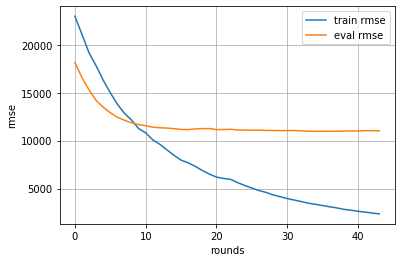

In [52]:
X = img_xception_256_df.drop('avg_sale_price_12_month', axis=1)
y = img_xception_256_df['avg_sale_price_12_month']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=20)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=20)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_val, label=y_val)

xgb_params = {
    # 回帰問題 reg:squarederror
    'objective': 'reg:linear',
    # 学習用の指標 (RMSE)
    'eval_metric': 'rmse', 
    'eta': 0.1471486873829153, 
    'learning_rate': 0.14078486017537256, 
    'max_depth': 10, 
    'subsample': 0.8828417080383908, 
    'colsample_bytree': 0.9273446949546377
}
evals = [(dtrain, 'train'), (dtest, 'eval')]
evals_result = {}
bst = xgb.train(xgb_params,
                dtrain,
                num_boost_round=1000,
                early_stopping_rounds=10,
                evals=evals,
                evals_result=evals_result,
                )

y_pred = bst.predict(dtest)
mse = mean_squared_error(y_val, y_pred)
print('RMSE:', math.sqrt(mse))

train_metric = evals_result['train']['rmse']
plt.plot(train_metric, label='train rmse')
eval_metric = evals_result['eval']['rmse']
plt.plot(eval_metric, label='eval rmse')
plt.grid()
plt.legend()
plt.xlabel('rounds')
plt.ylabel('rmse')
plt.show()

In [22]:
adidas_final_df = pd.read_csv('adidas_final_df.csv')
adidas_final_df.shape

(3857, 24)

In [64]:
dtest = xgb.DMatrix(X_test, label=y_test)

y_pred = bst.predict(dtest)
mse = mean_squared_error(y_test, y_pred)
print('RMSE:', math.sqrt(mse))

RMSE: 12700.617195950648


(-100000, 50000)

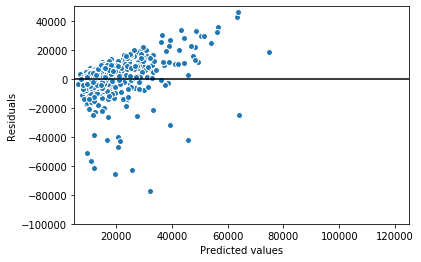

In [67]:
plt.scatter(y_pred, y_pred - y_test, edgecolor='white')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.hlines(y=0, xmin=5000, xmax=125000)
plt.xlim([5000, 125000])
plt.ylim([-100000, 50000])

(5000, 125000)

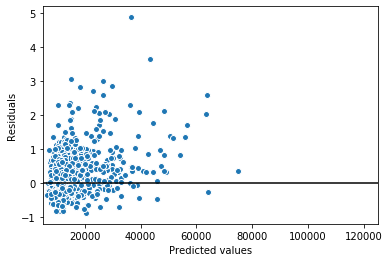

In [68]:
plt.scatter(y_pred, (y_pred - y_test)/y_test, edgecolor='white')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.hlines(y=0, xmin=5000, xmax=125000)
plt.xlim([5000, 125000])

In [62]:
X_test

,retail_price,img0,img1,img2,img3,img4,img5,img6,img7,img8,...,text246,text247,text248,text249,text250,text251,text252,text253,text254,text255
447,8376.0,-0.245653,-1.163718,0.776050,-0.231501,-0.528816,0.165941,1.212378,-1.342991,0.784033,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.103343,0.0,0.010943,0.013484
2429,18322.5,0.269281,-0.814960,1.309161,-0.295239,1.796776,-0.046466,0.193223,-0.895255,0.812812,...,0.005811,0.0,0.0,0.0,0.0,0.000000,0.096480,0.0,0.018067,0.005415
1346,13611.0,-1.008651,1.641640,0.082572,-0.212847,0.485254,-0.090819,-1.132973,-1.510209,-0.113419,...,0.010052,0.0,0.0,0.0,0.0,0.000000,0.102959,0.0,0.017370,0.015507
3213,13611.0,-0.449976,0.306957,0.274313,-0.112969,-0.718392,0.002974,-1.011551,-1.816030,-0.215518,...,0.007398,0.0,0.0,0.0,0.0,0.000000,0.099115,0.0,0.026865,0.008805
2515,16752.0,-0.112778,-0.194493,0.796810,-0.124149,0.846547,0.109745,-0.658167,0.181862,0.301934,...,0.000000,0.0,0.0,0.0,0.0,0.007248,0.095245,0.0,0.016411,0.010698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,13611.0,-1.373592,0.993946,-0.363155,-0.222831,-0.394789,1.041796,1.556971,-0.416281,-0.205547,...,0.010730,0.0,0.0,0.0,0.0,0.000000,0.088048,0.0,0.017285,0.010829
2741,18846.0,-0.995429,1.217861,-1.172955,-0.489359,0.833333,1.631716,1.027574,0.174514,-0.013071,...,0.000183,0.0,0.0,0.0,0.0,0.000000,0.103513,0.0,0.016826,0.013330
1281,13611.0,0.376698,0.200293,1.284358,0.716293,0.366129,-0.189573,-0.829206,-1.016094,1.578147,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.110875,0.0,0.025827,0.011340
476,15705.0,-1.438932,0.339386,-0.866534,0.034125,0.294264,-0.308235,0.587758,-0.435569,0.059144,...,0.005309,0.0,0.0,0.0,0.0,0.000000,0.097548,0.0,0.026653,0.009547


In [53]:
test_df_256 = pd.read_csv('test_df_256.csv')
test_df_256 = test_df_256.iloc[:, 1:]

test_df_256.shape

(35, 513)

In [63]:
test_df_256

,retail_price,img0,img1,img2,img3,img4,img5,img6,img7,img8,...,text246,text247,text248,text249,text250,text251,text252,text253,text254,text255
0,10470.0,-0.414854,-0.522963,-0.329483,-0.833609,0.114233,-0.115823,0.875571,-0.579439,-0.261622,...,0.022087,0.014084,0.0,0.004479,0.000000,0.0,0.0,0.030969,0.007615,0.0
1,14658.0,0.009471,-1.006957,0.015594,-0.614461,-0.018031,-1.893536,0.444570,0.245745,-0.470589,...,0.029421,0.018306,0.0,0.000000,0.000000,0.0,0.0,0.022892,0.020899,0.0
2,9423.0,-0.204479,-1.340509,-1.067241,-1.324784,1.165781,-1.229792,1.185206,-0.044093,-0.915304,...,0.029363,0.012996,0.0,0.002019,0.005374,0.0,0.0,0.027929,0.017871,0.0
3,15705.0,-1.374155,-0.548647,-2.816479,-1.550547,-1.125475,-0.108304,-0.056316,1.595250,-0.715115,...,0.025497,0.014431,0.0,0.006380,0.000000,0.0,0.0,0.024307,0.019309,0.0
4,10470.0,-0.673361,-1.958397,0.392317,-0.819707,0.604825,-0.881151,0.868197,0.546975,-0.875356,...,0.025592,0.025214,0.0,0.007462,0.002589,0.0,0.0,0.019691,0.028703,0.0
5,9423.0,-1.076121,-0.513399,0.130716,-1.634459,0.993123,-0.565051,-0.130496,1.148210,-0.271898,...,0.029320,0.019121,0.0,0.003541,0.007382,0.0,0.0,0.022955,0.027036,0.0
6,12564.0,-2.485461,-1.539480,-1.234822,-0.721012,1.127692,0.146372,-1.204817,0.284366,-0.605834,...,0.023905,0.018299,0.0,0.005860,0.000000,0.0,0.0,0.014570,0.027741,0.0
7,18846.0,0.026401,-0.112630,-0.945527,-0.448020,-0.170524,-1.198198,0.672984,-0.210589,-0.705209,...,0.029018,0.017198,0.0,0.000000,0.000000,0.0,0.0,0.019648,0.012717,0.0
8,18846.0,0.547464,0.879141,-1.427967,0.324718,-0.632991,-0.900996,0.315265,-0.039768,-1.053037,...,0.019071,0.017556,0.0,0.002484,0.000000,0.0,0.0,0.031958,0.021356,0.0
9,9423.0,-0.941704,-0.374607,-0.387258,-1.652651,-0.453891,-0.486468,0.421650,0.357966,-1.125934,...,0.029741,0.010006,0.0,0.011611,0.000000,0.0,0.0,0.022227,0.017060,0.0


In [54]:
dtest = xgb.DMatrix(test_df_256)

y_pred = bst.predict(dtest)

In [55]:
y_pred

array([314765.78, 316674.12, 314385.97, 324182.06, 307885.72, 311544.9 ,
        23402.24, 330122.75,  77760.45, 311369.84, 331999.94, 326034.8 ,
       311695.2 , 327308.53, 371891.4 , 322695.6 , 323088.28, 316346.03,
       329704.78, 324885.72, 315471.62, 377606.16, 376410.94, 312356.22,
       377872.4 , 379530.25, 375954.75, 312929.44, 330403.3 , 313271.16,
       329946.16, 324706.97, 324727.72, 327158.66, 322441.6 ],
      dtype=float32)

In [59]:
adidas_test_detail = pd.read_csv('./adidas_test_set/adidas_test_detail.csv')

adidas_test_detail['product_name'] = adidas_test_detail['product_name'].str.lower()
adidas_test_detail['id'] = adidas_test_detail['product_name'].str.replace(' ', '-')
adidas_test_detail['retail_price'] = adidas_test_detail['retail_price'] *104.7

adidas_test_detail['predicted_price'] = pd.DataFrame(y_pred)

adidas_test_detail

,id,product_name,retail_price,predictedd_price
0,adidas-don-issue-2-white-black-gold,adidas don issue 2 white black gold,10470.0,314765.781250
1,adidas-nmd-r1-star-wars-the-mandalorian,adidas nmd r1 star wars the mandalorian,14658.0,316674.125000
2,adidas-top-ten-hi-star-wars-the-mandalorian-th...,adidas top ten hi star wars the mandalorian th...,9423.0,314385.968750
3,adidas-zx-2k-boost-star-wars-the-mandalorian-m...,adidas zx 2k boost star wars the mandalorian m...,15705.0,324182.062500
4,adidas-gazelle-star-wars-the-mandalorian-darks...,adidas gazelle star wars the mandalorian darks...,10470.0,307885.718750
5,adidas-superstar-star-wars-the-mandalorian-the...,adidas superstar star wars the mandalorian the...,9423.0,311544.906250
6,adidas-d-rose-11-brenda,adidas d rose 11 brenda,12564.0,23402.240234
7,adidas-ultra-boost-dna-what-the-cloud-white,adidas ultra boost dna what the cloud white,18846.0,330122.750000
8,adidas-ultra-boost-20-what-the-solar-red,adidas ultra boost 20 what the solar red,18846.0,77760.453125
9,adidas-top-ten-core-black-gum,adidas top ten core black gum,9423.0,311369.843750
